In [6]:
import pandas as pd
import numpy as np
# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# For scaling the data
from sklearn.preprocessing import StandardScaler
# To perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# To perform Dimentionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [7]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
country=pd.DataFrame(df["country"])
df=df.drop("country",axis=1)
type(country)

pandas.core.frame.DataFrame

## Observations:
- **High Positive** correlation between variables:
    - child_mort and total_fer - which is expected
    - exports and imports
    - gdpp and income - which is expected
- **High Negative** correlation between variables:
    - child_mort and life_expec - which is expected
    - total_fer and life_expec - which is expected
- Other **Positive** Correlations
    - exports and income 
    - exports and gdpp
    - health and gdpp - Richer nations have better health spend.
    - income and life_expec - with better income life_expectancy of the child increases.
    - life_expec and gdpp - Rich nations have better child life expectancy.
- Other **Negative** Correlations
    - child_mort and income - with decrease in income (poor nations) child mortality is high.
    - child_mort and gdpp - Poorer nations have higher child mortality.
    - exports and child_mort - Nations where exports are high have high income and less child mortality.
    - inflation and health - Nations where inflation is high (economically affected countries) health spend is less.
    - income and total_fer
    - life_expec and inflation - Countries which have taken measures to economically counter inflation have better life expectency for children.
    - total_fer and gdpp

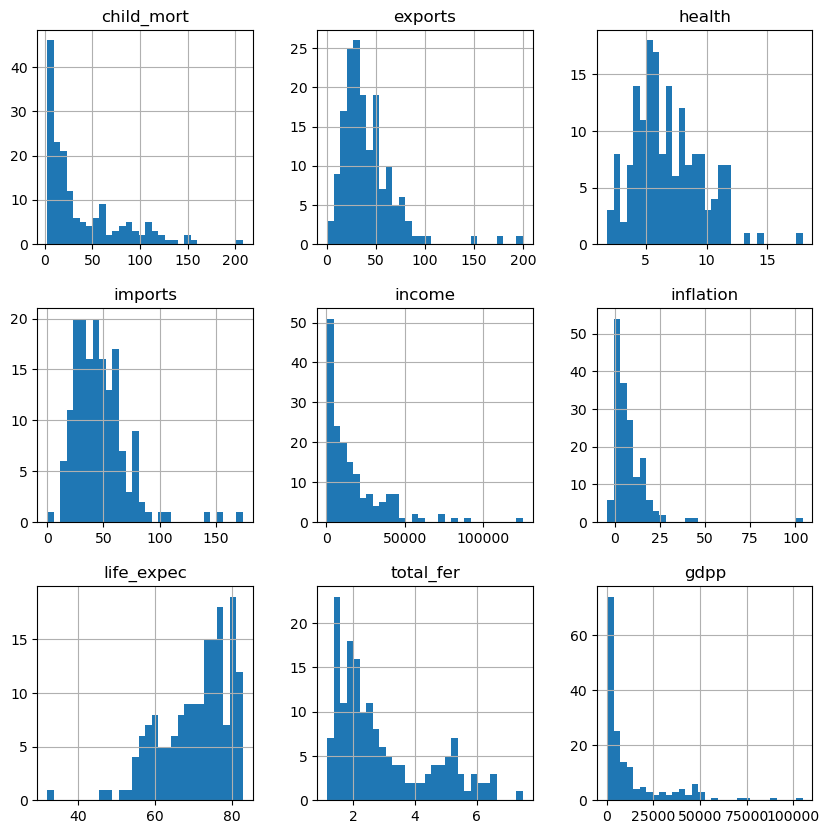

In [11]:
#  plot the distribution for all the numerical features.
df.hist(bins=30,figsize=(10,10));

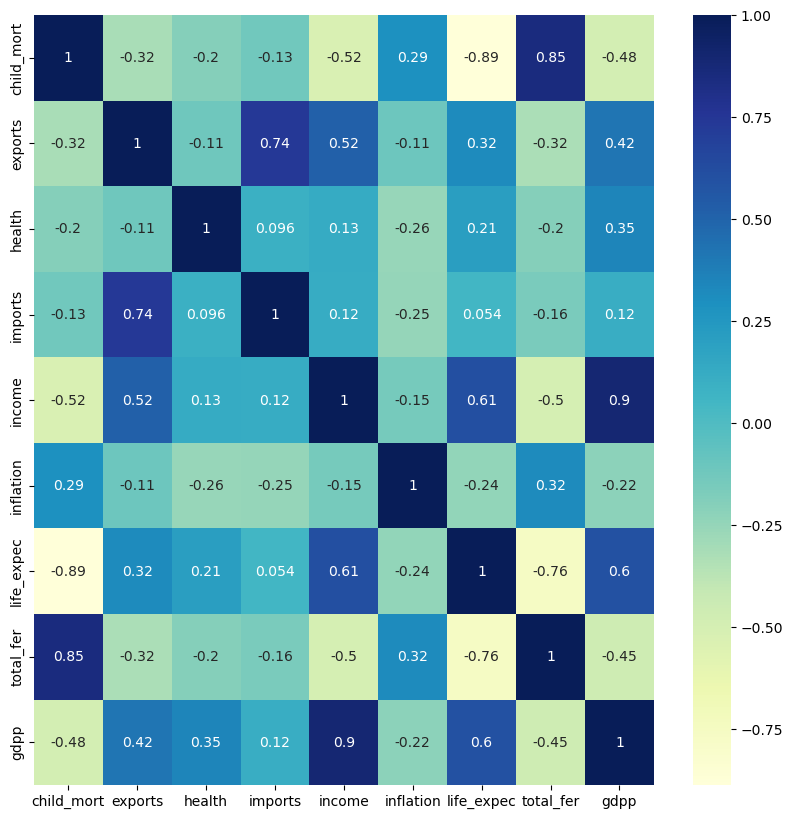

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [13]:
scaler=StandardScaler()
scaler.fit(df)
set_scaled=scaler.transform(df)

In [14]:
pca=PCA(n_components=2,random_state=0)
x_pca=pca.fit_transform(set_scaled)
data_pca = pd.DataFrame(x_pca)

Text(0, 0.5, 'PC2')

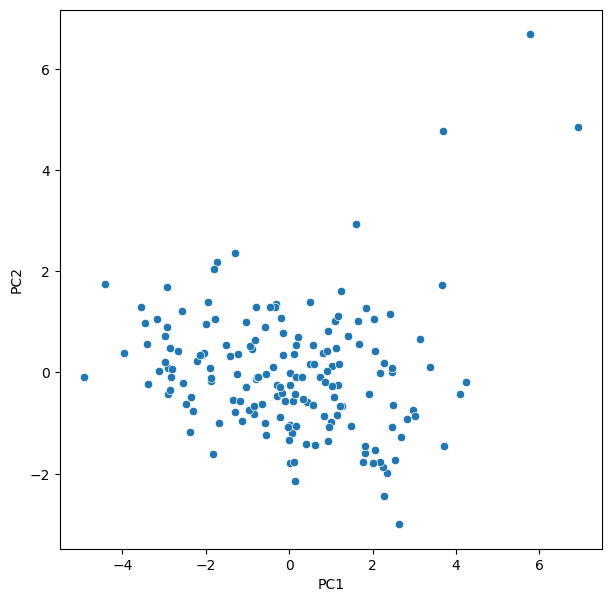

In [15]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca[0],y=data_pca[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [16]:
tsna=TSNE(n_components = 2,random_state=0)
x_tsna=tsna.fit_transform(set_scaled)
data_tsna=pd.DataFrame(x_tsna)

<Axes: xlabel='0', ylabel='1'>

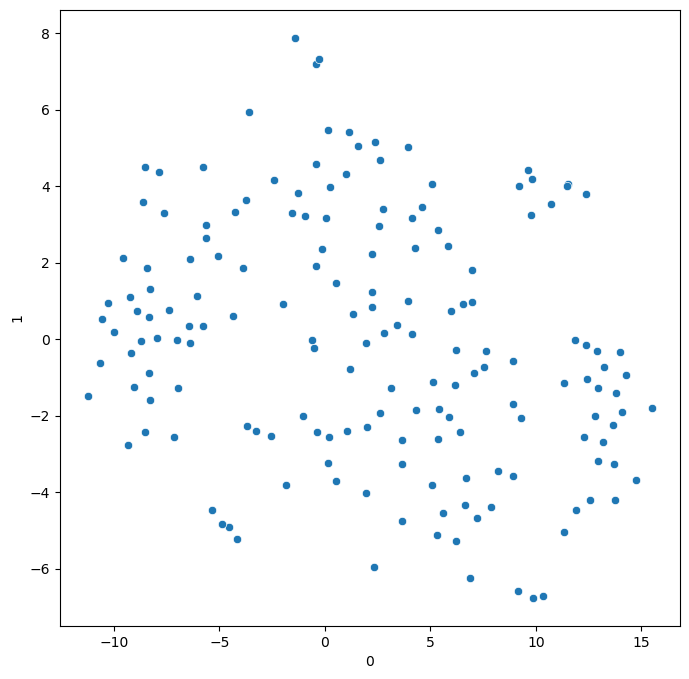

In [17]:
plt.figure(figsize = (8,8))
sns.scatterplot(x=data_tsna[0],y=data_tsna[1])

In [18]:
kmeans=KMeans(n_clusters=2,random_state=2)
kmeans.fit(set_scaled)
# Adding predicted Labels to scaled data and original data
df["kmean_labels"] = kmeans.predict(set_scaled)
df["kmean_labels"].value_counts()
# Adding predicted Labels to scaled data and original data
df["kmean_labels"] = kmeans.predict(set_scaled)
df["kmean_labels"].value_counts()

/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    99
1    68
Name: kmean_labels, dtype: int64

/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

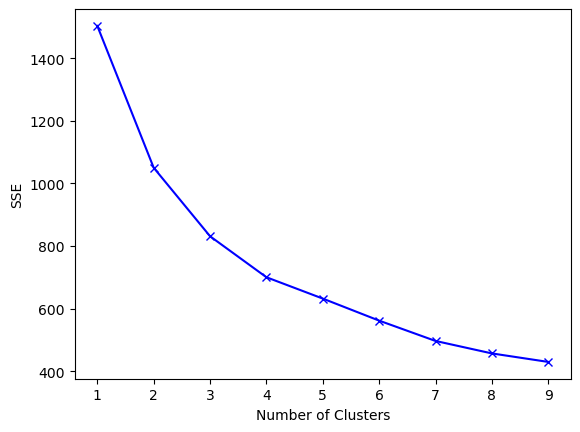

In [21]:
#Empty dictionary to store the SSE (sum of Squares errors) for each value of k
sse = {} 

#iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
#store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(set_scaled)
    sse[k] = kmeans.inertia_

#Plotting the findings
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Observations
- After 2 to 9 we do not see any elbow, its a consistant dip.

/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_m1_20_/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

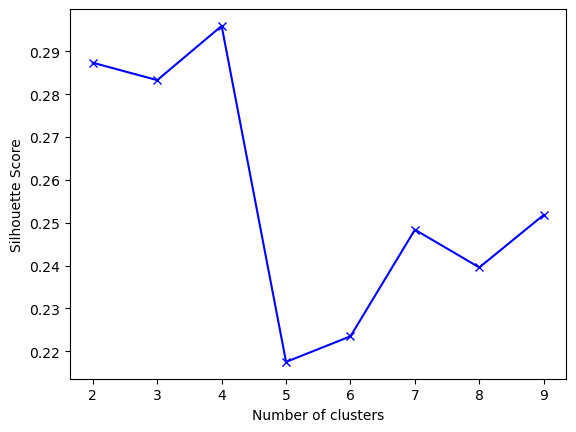

In [24]:
from sklearn.metrics import silhouette_score
#Silhoutte score dict
sc = {}

#iterating over a range of ks fitting it to k-means and getting the silhoute score for each.
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(set_scaled)
    labels = kmeans.predict(set_scaled)
    sc[k] = silhouette_score(set_scaled, labels)

#Lets plot the finding - Maybe we will find an elbow
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

## Observations:
Silhouette score is highest for k = 3. Lets go with 3 clusters.

In [ ]:
# getting mean and median for each variable in the dataset
mean = df.groupby("kmean_labels").mean()
median = df.groupby("kmean_labels").median()

# Creating dataframe with means and medians 
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ["Group0_mean", "Group1_mean", "Group0_median", "Group1_median"]
df_kmeans.T

,Group0_mean,Group1_mean,Group0_median,Group1_median
child_mort,12.161616,76.280882,10.30,65.60
exports,48.603030,30.198515,40.10,24.95
health,7.314040,6.090147,7.04,5.34
imports,49.121212,43.642146,46.20,41.50
income,26017.171717,4227.397059,19400.00,2590.00
inflation,5.503545,11.098750,3.53,8.21
life_expec,76.493939,61.910294,76.40,62.00
total_fer,1.941111,4.413824,1.88,4.58
gdpp,20507.979798,1981.235294,11900.00,1155.00


In [ ]:
output= pd.DataFrame({'country': country.country,
                       'kmean_labels': df["kmean_labels"]})
output.head()

,country,kmean_labels
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0


In [ ]:
#df=df.drop("kmean_labels",axis=1)
agg=AgglomerativeClustering(n_clusters=2,linkage="complete")
# Adding predicted Labels to scaled data and original data
df["Agg_labels"] = agg.fit_predict(set_scaled)
df["Agg_labels"].value_counts()

0    112
1     55
Name: Agg_labels, dtype: int64

In [ ]:
# getting mean and median for each variable in the dataset
mean = df.groupby("Agg_labels").mean()
median = df.groupby("Agg_labels").median()
# Creating dataframe with means and medians 
df_agg = pd.concat([mean, median], axis=0)
df_agg.index = ["Group0_mean", "Group1_mean", "Group0_median", "Group1_median"]
df_agg.T

,Group0_mean,Group1_mean,Group0_median,Group1_median
child_mort,16.683036,82.229091,11.350,80.30
exports,45.873027,31.407636,38.950,25.30
health,6.906250,6.631273,6.845,5.69
imports,46.082731,48.534545,42.100,44.90
income,23691.875000,3812.236364,17250.000,2180.00
inflation,6.370902,10.655000,3.970,6.39
life_expec,75.466964,60.554545,76.050,60.70
total_fer,2.078839,4.717818,1.940,4.95
gdpp,18388.750000,1917.709091,9685.000,1000.00
kmean_labels,0.133929,0.963636,0.000,1.00


In [ ]:
output_agg= pd.DataFrame({'country': country.country,
                       'kmean_labels': df["Agg_labels"]})
output_agg.head()

,country,kmean_labels
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0


In [ ]:
df["kmean_labels"] = kmeans.predict(set_scaled)

print("Countries to concentrate on using K Medoids")
df[df["kmean_labels"] == 1]

Countries to concentrate on using K Medoids


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_labels,Agg_labels
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
12,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1,0
17,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,1
19,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,1,0
...,...,...,...,...,...,...,...,...,...,...,...
155,81.0,17.1,9.01,28.6,1540,10.600,56.8,6.15,595,1,1
161,36.3,31.7,5.81,28.5,4240,16.500,68.8,2.34,1380,1,0
162,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,1,1
165,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310,1,1


In [ ]:
df["Agg_labels"] = agg.fit_predict(set_scaled)

print("Countries to concentrate on using Agg")
df[df["Agg_labels"] == 1]

Countries to concentrate on using Agg


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_labels,Agg_labels
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,1
18,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,0,1
21,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,1
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1
27,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,1,1
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,1
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1
